<img src="GaussProcess.jpg" width="400" height="400" align="right"/>

# Gaussian Process Regression 

Author: Christoph Guettner

**Abstract**  
Here, three different kernels(RBF, Rational Quadradtic, Matern)  
are used to fit a Gaussian Process Model and are compared afterwards.  
Thereby, the training sample of 15 data points has a bias to avoid heights  
and lows.

In general, a Gaussian Process $\mathcal{GP}(\mu(x),\, K(x, y))$ is complete  
described by its mean function  
  
$\mu(x) = \boldsymbol{\Sigma}_{xy}  \boldsymbol{\Sigma}_{xx}^{-1} x$   
  
and covariance function,  
  
$K(x,y) = \boldsymbol{\Sigma}_{yy} - \boldsymbol{\Sigma}_{xy}  \boldsymbol{\Sigma}_{xx}^{-1} \boldsymbol{\Sigma}_{yx}$  
  
which determine what and how much information about the unobserved  
values $f(y)$  can be derived from information about known values $f(x)$ .  

**Results:** The generating Matern Kernel also achieves the highest score.




Image credit: Kai Arulkumaran

## Table of Contents
* [Loading and Preprocessing](#Loading_and_Preprocessing)
    * [Imports](#Imports)
    * [Functions](#Functions)
* [The Model](#The_Model)
    * [The Covariance Function](#The_Covariance_Function)
    * [The Kernel Function](#The_Kernel_Function)
    * [Prior GP Distribution](#Posterior_Distribution)
 
* [Data: Gaussian Process](#Data:_Gaussian_Process)
    * [Observed Data Points](#Observed_Data_Points)
    * [The Latent Function](#The_Latent_Function)

* [Posterior Distribution](#Posterior_Distribution)
    * [Conditional Probability](#Conditional_Probability)
    * [The Mean Function](#The_Mean_Function)
    * [The Posterior Samples](#The_Covariance_Function)
* [Evaluation](#Evaluation)


In [524]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns 
sns.set()

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import (RBF, WhiteKernel, Matern, RationalQuadratic,
                                              ExpSineSquared, DotProduct,
                                              ConstantKernel, Exponentiation)

In [525]:
def plot_kernel_sample():
    fig, axes = plt.subplots(3,1, figsize=(15,10))
    fig.tight_layout
    for i,ax in enumerate(axes.flatten()):
        gp = GaussianProcessRegressor(kernel=kernels[i])
        y_samples = gp.sample_y(X_[:, np.newaxis], 30)
        ax.set_title(kernel_names[i])
        ax.plot(X_, y_samples, lw=1)
        ax.set_ylim(-5,5)

def plot_posterior_sample(i):
    fig, (ax1,ax2) = plt.subplots(2,1, figsize=(15,10))
    ax1.plot(X_,latent_function,lw=2.0,alpha=0.8,color='k', label='True Latent Function', zorder=9)
    ax1.plot(X_,Y_Means[i], color='#8A3230', label='Mean Function', zorder=9)
    ax1.scatter(data[0], data[1], color='k', label='Observed Data', zorder=9)
    ax1.set_title(kernel_names[i])
    ax1.plot(X_, Y_Samples[i], lw=1, alpha=0.8)
    ax1.legend()
    ax2.plot(X_,latent_function,lw=2.0,alpha=0.8,color='k', label='True Latent Function', zorder=9)
    ax2.plot(X_,Y_Means[i], color='#8A3230', label='Mean Function', zorder=9)
    ax2.scatter(data[0], data[1], color='k', label='Observed Data', zorder=9)
    ax2.fill_between(X_, Y_Means[i] - S_Deviation[i], Y_Means[i] + S_Deviation[i], alpha=0.2, color='r')
    ax2.legend()

## The Model  
  
  
The GP approach, in contrast, is a non-parametric approach, in that it finds a distribution over the possible functions 
f(y) that are consistent with the observed data f(x),x.  
  
  \begin{equation}\begin{bmatrix}{\boldsymbol f(x)} \\ 
{\boldsymbol f(y)} \end{bmatrix} \sim 
 \mathcal{N} \begin{aligned} 
(\begin{bmatrix}
 \boldsymbol\mu_1 \\
 \boldsymbol\mu_2
\end{bmatrix},
\begin{bmatrix} 
\boldsymbol{\Sigma}_{xx} & \boldsymbol{\Sigma}_{xy} \\
\boldsymbol{\Sigma}_{xy}^{-1} & \boldsymbol{\Sigma}_{yy} \\
\end{bmatrix} 
\end{aligned} )\end{equation}

The key idea is that if f(x) and f(y) are deemed by the kernel to be similar,  
then we expect the output of the function at those points to be similar, too.    
The mean- and covariance function depend on the chosen kernel function (prior knowledge).  
  
$\begin{equation} \boldsymbol{\Sigma}_{xx}=\begin{aligned} 
\begin{bmatrix} 
{k(x_1,x_1)} & {...}&{k(x_1,x_n)}\\
{...}& {...} &{...} \\
{k(x_n,x_1)} & {...}&{k(x_n,x_n)} \\
\end{bmatrix} 
\end{aligned} \end{equation}$  

   $\begin{equation} \boldsymbol{\Sigma}_{xy}=\begin{aligned} 
\begin{bmatrix} 
{k(x_1,y_1)} & {...}&{k(x_1,y_n)}\\
{...}& {...} &{...} \\
{k(x_n,y_1)} & {...}&{k(x_n,y_n)} \\
\end{bmatrix} 
\end{aligned} \end{equation}$  

  $\begin{equation} \boldsymbol{\Sigma}_{yx}=\begin{aligned} 
\begin{bmatrix} 
{k(y_1,x_1)} & {...}&{k(y_1,x_n)}\\
{...}& {...} &{...} \\
{k(y_n,x_1)} & {...}&{k(y_n,x_n)} \\
\end{bmatrix} 
\end{aligned} \end{equation}$  
  
  $\begin{equation} \boldsymbol{\Sigma}_{yy}=\begin{aligned} 
\begin{bmatrix} 
{k(y_1,y_1)} & {...}&{k(y_1,y_n)}\\
{...}& {...} &{...} \\
{k(y_n,y_1)} & {...}&{k(y_n,y_n)} \\
\end{bmatrix} 
\end{aligned} \end{equation}$  
  
The parameter of the kernel function are Hyperparameter here or  
could also be derived by the maximum likelihood method after the data is observed.


  
 


## The Kernels  

In [526]:
kernel_names=['RBF Kernel','RationalQuadratic Kernel', 'Matern Kernel' ]
kernels = [1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0)),
           1.0 * RationalQuadratic(length_scale=1.0, alpha=0.6),
           1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)]



### RBF Kernel  
  

$k(x_i, x_j) = \exp\left(- \frac{d(x_i, x_j)^2}{2l^2} \right)$  
  

### Rational Quadradic Kernel

$k(x_i, x_j) = \left(
1 + \frac{d(x_i, x_j)^2 }{ 2\alpha  l^2}\right)^{-\alpha}$  
  
### Matern Kernel 

$k(x_i, x_j) =  \frac{1}{\Gamma(\nu)2^{\nu-1}}\Bigg(
\frac{\sqrt{2\nu}}{l} d(x_i , x_j )
\Bigg)^\nu K_\nu\Bigg(
\frac{\sqrt{2\nu}}{l} d(x_i , x_j )\Bigg)$ 

**Note:** The kernels are stationary. (e.g. smoothness).

### Number of parameter in the kernel function

In [527]:
kernels[0].n_dims,kernels[1].n_dims,kernels[2].n_dims

(2, 3, 2)

## GPR Samples from the Prior Distribution

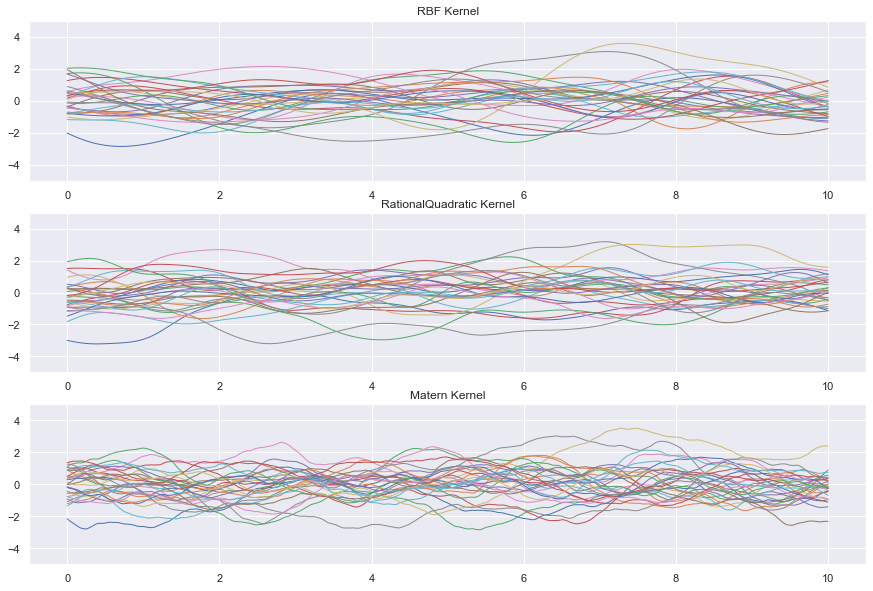

In [528]:
plot_kernel_sample()

## Data 

The latent function is sampled from a Gauss Process  
with Matern kernel function. From the latent function  
are again 15 sample points generated (two level approach).  
  


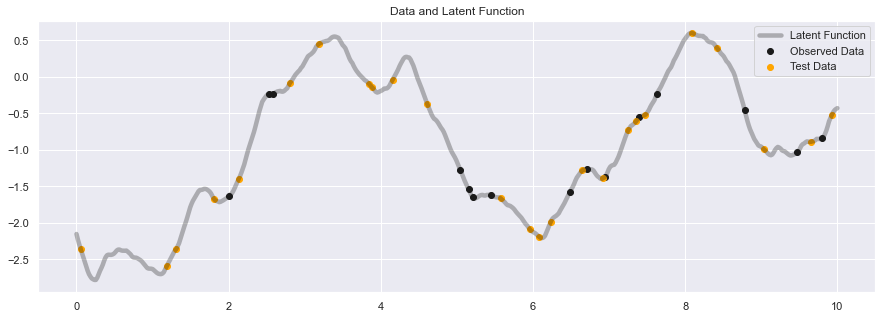

In [529]:
true_kernel =  [1.0 * Matern(length_scale=1.0, length_scale_bounds=(1e-1, 10.0), nu=1.5)]

np.random.seed(4) 

gp = GaussianProcessRegressor(kernel=true_kernel[0])

X_ = np.linspace(0, 10, 550)
#gp.predict(X)
latent_function = gp.sample_y(X_[:, np.newaxis], 1)[:,0]

dict = {'X':X_, 'Latent Function':latent_function}
df=pd.DataFrame(dict)

#test_sampling
df['test_data'] = df['Latent Function'].sample(25)
test_X = df['X'][df['test_data'].notna()]
test_data = df['test_data'][df['test_data'].notna()]
test = (test_X,test_data)

#biased sampeling
mean = df['Latent Function'].mean()
std = 0.8 * df['Latent Function'].std()
df['observed_data'] = df['Latent Function'][df['Latent Function'].between((mean-std),(mean+std))].sample(15)

observed_X = df['X'][df['observed_data'].notna()]
observed_data = df['observed_data'][df['observed_data'].notna()]

data=(observed_X, observed_data)

plt.figure(figsize=(15,5))
plt.plot(X_,latent_function,lw=4.5,alpha=0.3,color='k', label='Latent Function')
plt.scatter(data[0], data[1], color='k', label='Observed Data')
plt.scatter(test[0],test[1], color='orange', label='Test Data')
plt.title('Data and Latent Function')
plt.legend()



## Posterior Distribution  
  
### How to make predictions?  


As with all Bayesian methods it begins with a prior distribution and updates this  
as data points are observed, producing the posterior distribution over functions.  
  
**Bayes Theorem:** $Pr(\mu, \Sigma|f(x)) = \frac{Pr(f(x)|\mu, \Sigma)Pr(\mu, \Sigma)}{\int Pr(f(x)|\mu, \Sigma)Pr(\mu, \Sigma) d\mu d\Sigma}$

The Gaussian distribution has the beneficial properties that marginalising out  
as well as conditioning of a (infinite) multivariate Gaussian returns again a Gaussian.  
  
**Posterior Distribution:** $Pr(f(y)| f(x), x,y)  \sim \mathcal{N} (\boldsymbol{\Sigma}_{xy}  \boldsymbol{\Sigma}_{xx}^{-1} f(x), \boldsymbol{\Sigma}_{yy} - \boldsymbol{\Sigma}_{xy}  \boldsymbol{\Sigma}_{xx}^{-1} \boldsymbol{\Sigma}_{yx})$ 


In [530]:
Scores, Y_Means, S_Deviation, Y_Samples = [], [], [], []
for i in range(len(kernels)):
    gp = GaussianProcessRegressor(kernel=kernels[i])
    gp.fit(data[0].values.reshape(-1,1), data[1].values)
    y_samples = gp.sample_y(X_[:, np.newaxis], 30)
    y_mean, y_std = gp.predict(X_[:, np.newaxis], return_std=True)
    score = gp.score(test[0].values.reshape(-1,1), test[1].values)
    Scores.append(score)
    Y_Means.append(y_mean)
    S_Deviation.append(y_std )
    Y_Samples.append(y_samples)

### The Meanfunction

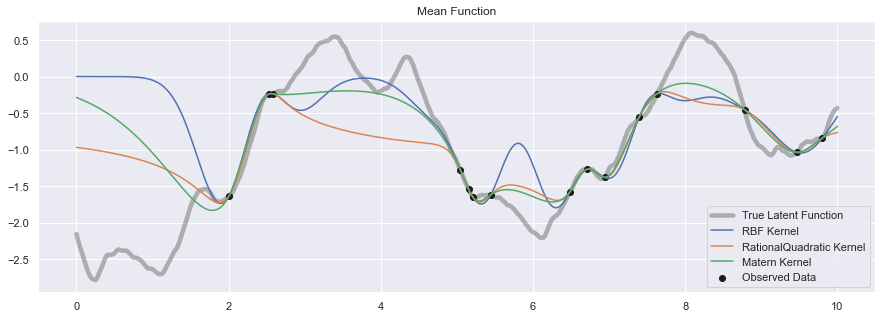

In [531]:
plt.figure(figsize=(15,5))
plt.plot(X_,latent_function,lw=4.5,alpha=0.3,color='k', label='True Latent Function')
plt.title('Mean Function')
plt.scatter(data[0], data[1], color='k', label='Observed Data')
for i in range(len(kernels)):
    plt.plot(X_,Y_Means[i], label=kernel_names[i])
    plt.legend()

### Samples from the Gaussian Process Modell (plus Confidence Interval Plot)  
  

$f(y) \sim \mathcal{GP}(\mu(x),\, K(x, y))$

### RBF Kernel

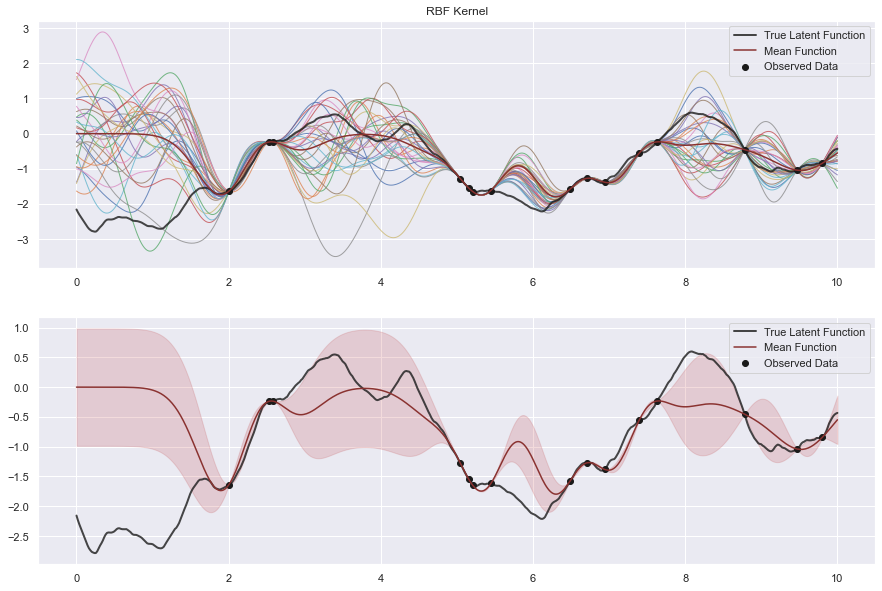

In [532]:
plot_posterior_sample(0)

### Rational Quadradic Kernel



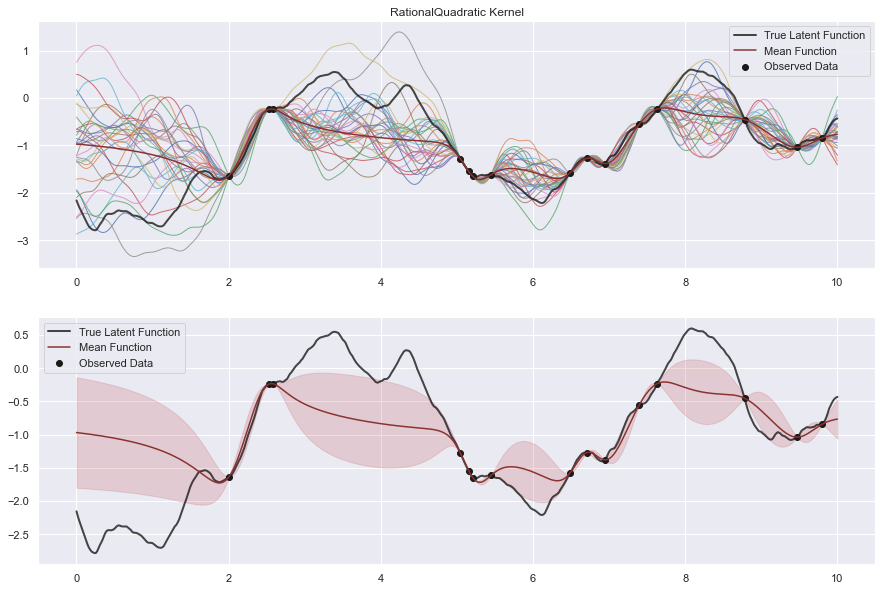

In [533]:
plot_posterior_sample(1)

### Matern Kernel

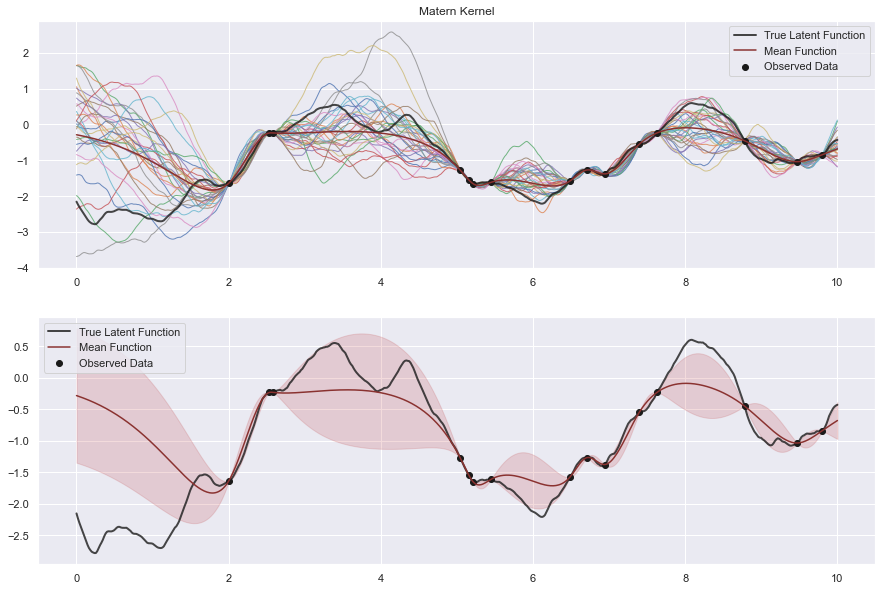

In [534]:
plot_posterior_sample(2)

## Evaluation (for the biased training sample)

<AxesSubplot:>

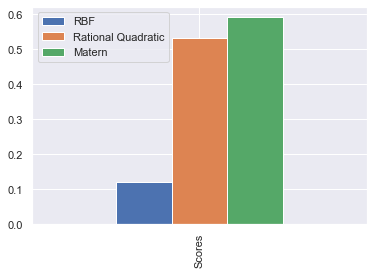

In [535]:
dict_score ={'RBF':Scores[0], 'Rational Quadratic':Scores[1],'Matern': Scores[2]}
df_Scores = pd.DataFrame(dict_score, index=['Scores'])

df_Scores.plot.bar()

In [536]:
df_Scores

,RBF,Rational Quadratic,Matern
Scores,0.121114,0.533056,0.591877
